---
# Aflevering 5 
ID: <br>202280599<br> 202108350<br> 202205825<br>
Authors:<br> Mads K. T. Larsen<br> Julian B. Christensen<br> Kristopher B. E. Märcher<br>

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vi skal se hvordan vi kan flytte en figur i planen til en standard position. Betragt en ottetalsfigur i planen givet ved

$$
x(t)=3 \cos (t), \quad y(t)=\sin (2 t), \quad \text { for } 0 \leqslant t \leqslant 2 \pi .
$$

Vi vil danne nogle datapunkter, som ligger tæt på en drejet version af denne figur.

# A
Plot kurven (x(t), y(t)) i python.

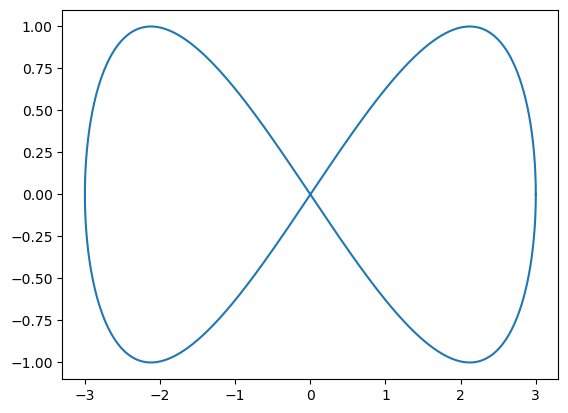

In [2]:
# The x function    
def xfunction(t):
    return 3 * np.cos(t)

# The y function
def yfunction(t):
    return np.sin(2*t)

# Define 2000 values for t
t = np.linspace(0,2*np.pi,2000)

# Calculated x values
x_values = xfunction(t)
# Calculated y values
y_values = yfunction(t)

#All points
jointPoints = np.vstack([x_values,y_values])

# Function for plotting matrix
def plot_matrix(matrixOfPoints,option="-"):
    fig, ax = plt.subplots()
    ax.plot(matrixOfPoints[0,:],matrixOfPoints[1,:],option)

# Plot function
plot_matrix(jointPoints)

## B
Brug

``` Python
rng = np.random.default_rng()
theta = rng.uniform(...)
```
til at vælge en tilfældig vinkel $\Theta$ mellem $\frac{\pi}{5}$ og $\frac{4\pi}{5}$. Drej kurven med RotationsMatricen R:


$$
R = 
\begin{bmatrix}
cos(\Theta) & -sin(\Theta)\\
sin(\Theta) & cos(\Theta)
\end{bmatrix}
$$



og Plot resultatet




current Theta:  2.446183199259746


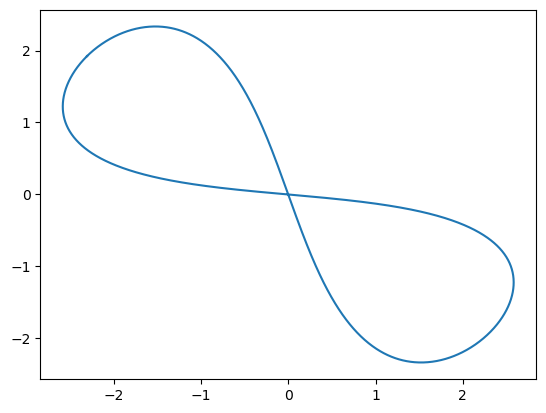

In [3]:
# Random
rng = np.random.default_rng()
#Theta
theta = rng.uniform(np.pi/5,np.pi*4/5)
print("current Theta: ",theta)
#RotationsMatrix
R = np.array([[np.cos(theta),-np.sin(theta)],
              [np.sin(theta),np.cos(theta)]])


# Rotated points
rotated = R @ jointPoints

# Plot the rotated function
plot_matrix(rotated)

## C
For et rimeligt stort n f.eks n=2000, dan en (2xn)-matrix hvis søjler er tilfældige punker fra den drejede kurve. Ved hjælp af
``` Python
rng.normal(0.0,0.1,(2,n))
```
eller noget lignende. Tilføj støj til alle indgange til at få en matrice A. Plot punkterne i resultatet.


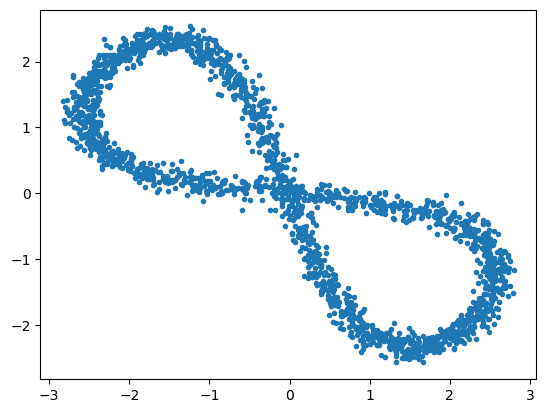

In [4]:
#Define n
n = 2000
# Create noise matrix
twonMatrix = rng.normal(0.0,0.1,(2,n))

# Creat A which is matrix rotated with noise
A = twonMatrix + rotated

# Plot A
plot_matrix(A,option = ".")

Nu vil vi forsøge at opdage hvordan figuren fra A kan bringes tilbage til den oprindelige figur, uden kendskab til matricen R.
## D

For hver række i A , træk middelværdien fra, og dermed dan en ny matrix B hvor hver række har middelværdi 0. 

Der må gerne anvendes np.mean(..., axis=..., ...).

In [5]:
#Mean of X and Y values
mean = np.mean(A,axis=1)
print("mean of A",mean)

#Constructing B matrix
B = np.vstack([A[0,:] + mean[0],A[1,:] + mean[1]])

#Calculating mean of B
Bmean = np.mean(B,axis=1)
print("mean of B",Bmean)


mean of A [-0.00607243  0.00149125]
mean of B [-0.01214487  0.00298249]


## E

Brug python til at beregne singulærværdidekomponeringen $B = UΣV^T$ af B. Angiv U ∈ ℝ 2×2 og singulærværdierne. Bekræft at U er ortogonal.

In [6]:
# Let python calculate SVD
u , s, vt = np.linalg.svd(B, full_matrices=False)

print("U= \n",u,"\nshape of U",u.shape)
print("\nSigma= \n",s,"\n shape of Sigma",s.shape)
print("\nV^T= \n",vt,"\n shape of Vt",vt.shape)

#Defination 8.5
def cosAngle(u,v):
    prikprodukt = u.T @ v
    uLength = np.linalg.norm(u)
    vLength = np.linalg.norm(v)
    result = prikprodukt/(uLength*vLength)
    return result

print("\nU^T U = \n", np.round(u.T @ u))
print("Defination 9.1 can be used since U is a square matrix.")
print("Therefore since it is the Identity matrix, it is orthogonal")

U= 
 [[-0.76840288  0.63996642]
 [ 0.63996642  0.76840288]] 
shape of U (2, 2)

Sigma= 
 [95.07814106 31.95239864] 
 shape of Sigma (2,)

V^T= 
 [[ 0.03031041  0.03167838  0.03170615 ...  0.03065861  0.03049616
   0.03168166]
 [-0.00050518  0.00157633  0.00079268 ...  0.00822243  0.0004586
  -0.00302322]] 
 shape of Vt (2, 2000)

U^T U = 
 [[1. 0.]
 [0. 1.]]
Defination 9.1 can be used since U is a square matrix.
Therefore since it is the Identity matrix, it is orthogonal


## F

Beskriv hvordan singulærværdierne og de venstre singulærvektorer for B er relateret til figuren.

### Besvarelse

Den venstre singulære, U  og singulær værdierne $\Sigma$ relatere sig til figuren på følgende måde.

Værdierne i U beskriver ændringen i vinkelen fra den originale figur til B. Singulærværdierne beskriver faktoeren som skal ganges på enhedsbektoren som U konsturere. 

I vores eksempel har vi derfor at $U_0\sigma_0$ beskriver s0u0, som i vores tilfælde beskriver den "store" del af 8 tallet.

angle between s0u0 and s1u1
 [[90. 90.]
 [90. 90.]]


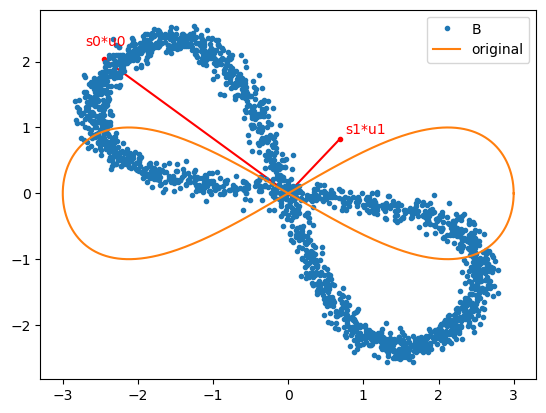

In [7]:
# Define Origo
origo = np.zeros((2,1))
# Define Scale
scale = 1.5/np.sqrt(n)
# Define scale for text
tscale = 1.1 * scale


fig, ax = plt.subplots()


s0u0 = np.hstack([origo, u[:, [0]]*s[0]*scale])
s1u1 = np.hstack([origo, u[:, [1]]*s[1]*scale])
# Check that s0u0 and s1u1 is orthogonal
print("angle between s0u0 and s1u1\n",np.degrees(np.arccos(cosAngle(s0u0,s1u1))))

# plot s0u0 and s1u1
ax.plot(*(s0u0), color='red', marker='.')
ax.plot(*(s1u1), color='red', marker='.')
ax.text(*u[:, [0]]*s[0]*tscale, 's0*u0', color='red')
ax.text(*u[:, [1]]*s[1]*tscale, 's1*u1', color='red')

ax.plot(B[0,:],B[1,:],".",label = "B")


ax.plot(x_values,y_values, label = "original")

ax.legend()

U og Singulærværdierne fortæller tilsammen hvor variationen er størst og mindst.

## G
Vis hvordan den ortogonale matrix U kan bruges til at flytte figuren givet ved B, så den ligger tæt på den oprindelige ottetalsfigur.

### Besvarelse

Eftersom det er vist i tidligere opgave at U er ortogonal. Ved vi at $U^T = U^{-1}$, som også benyttes i afsnit 10.1.

Eftersom vi forklarede tidligere at U påvirkede funtionens vinkel. Vil vi ved at kunne gange den inverse til U få identitetsmatricen og derved modvirke rotationen. Eftersom at vi kun påvirker vores figur med en rotationsmatrice, ændre vi ikke længden og derved ikke singulærværdierne.

Vi har under vist hvordan dette virker

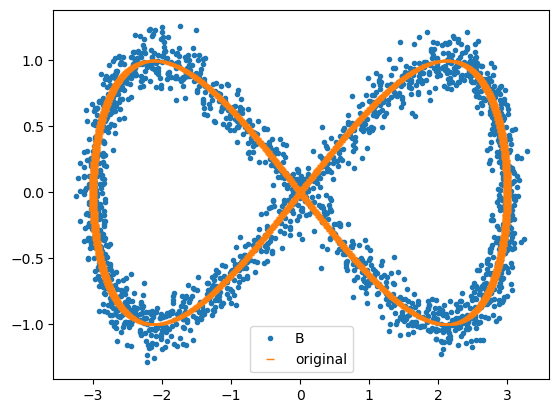

In [8]:
# Calculate the canceled out rotation
cancel_out_rotation = u.T @ B

#Plot B canceled out and A
fig, ax = plt.subplots()
ax.plot(cancel_out_rotation[0,:],cancel_out_rotation[1,:],".", label = "B")
ax.plot(x_values,y_values,"_" ,label = "original")
ax.legend()